<a href="https://colab.research.google.com/github/BaiTheBest/fatty-babby/blob/master/IMDB(RNN%2CLSTM%2CCNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6432 - acc: 0.6129 - val_loss: 0.5045 - val_acc: 0.7606
Epoch 2/10
20000/20000 [==============================] - 19s 962us/step - loss: 0.4311 - acc: 0.8100 - val_loss: 0.4081 - val_acc: 0.8246
Epoch 3/10
20000/20000 [==============================] - 19s 952us/step - loss: 0.3075 - acc: 0.8771 - val_loss: 0.4159 - val_acc: 0.8122
Epoch 4/10
20000/20000 [==============================] - 19s 948us/step - loss: 0.2295 - acc: 0.9113 - val_loss: 0.3928 - val_acc: 0.8322
Epoch 5/10
20000/20000 [==============================] - 19s 947us/step - loss: 0.1719 - acc: 0.9363 - val_loss: 0.3964 - val_acc: 0.8424
Epoch 6/10
20000/20000 [==============================] - 19s 943us/step - loss: 0.1352 - acc: 0.9503 - val_loss: 0.5839 - val_acc: 0.7714

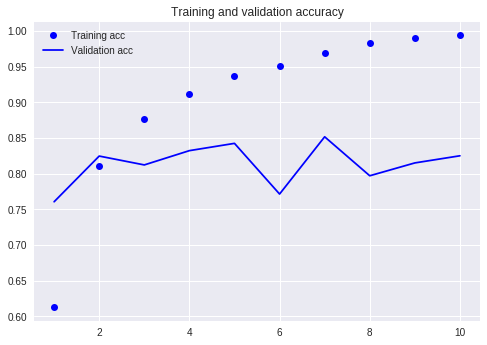

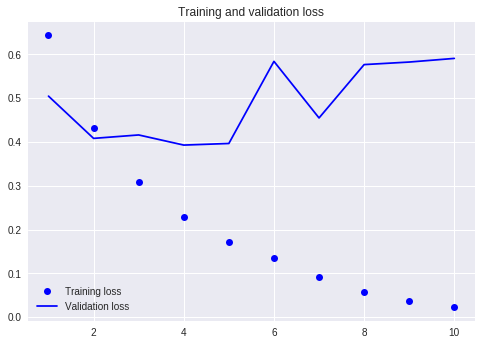

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from keras.layers import LSTM

model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.5084 - acc: 0.7647 - val_loss: 0.6182 - val_acc: 0.7234
Epoch 2/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.2951 - acc: 0.8831 - val_loss: 0.2804 - val_acc: 0.8854
Epoch 3/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2325 - acc: 0.9108 - val_loss: 0.3486 - val_acc: 0.8764
Epoch 4/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2024 - acc: 0.9262 - val_loss: 0.3182 - val_acc: 0.8622
Epoch 5/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1734 - acc: 0.9370 - val_loss: 0.2976 - val_acc: 0.8836
Epoch 6/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1531 - acc: 0.9435 - val_loss: 0.3400 - val_acc: 0.8768
Epoch 7/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.1397 - acc: 0.9501 - val_loss: 0.3159 - val_acc:

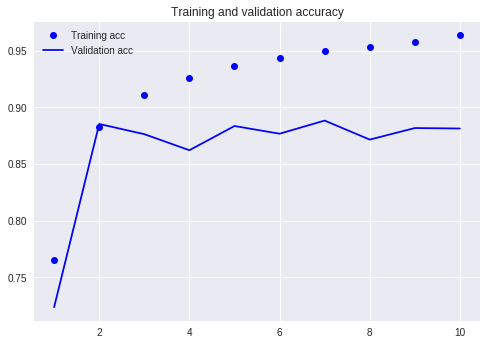

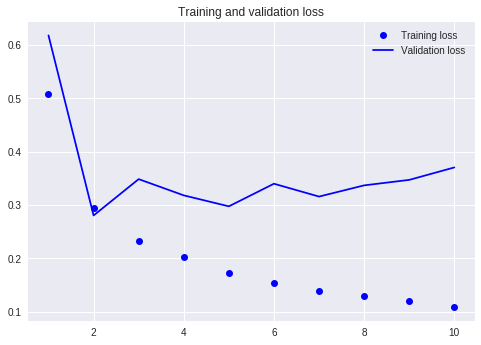

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [14]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()

model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 86s 4ms/step - loss: 0.8337 - acc: 0.5094 - val_loss: 0.6874 - val_acc: 0.5652
Epoch 2/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.6699 - acc: 0.6387 - val_loss: 0.6641 - val_acc: 0.6584
Epoch 3/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.6235 - acc: 0.7534 - val_loss: 0.6080 - val_acc: 0.7440
Epoch 4/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.5257 - acc: 0.8080 - val_loss: 0.4826 - val_acc: 0.8062
Epoch 5/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.4149 - acc: 0.8469 - val_loss: 0.4309 - val_acc: 0.8310
Epoch 6/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.3523 - acc: 0.8679 - val_loss: 0.4161 - val_acc: 0.8350
Epoch 7/10
20000/20000 [===========================

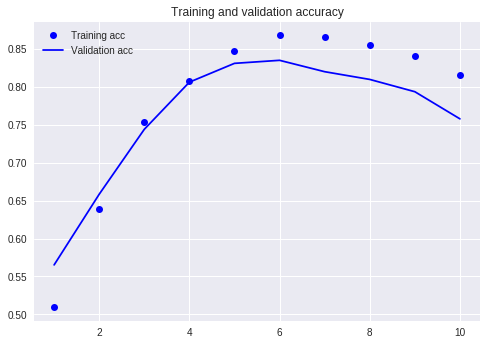

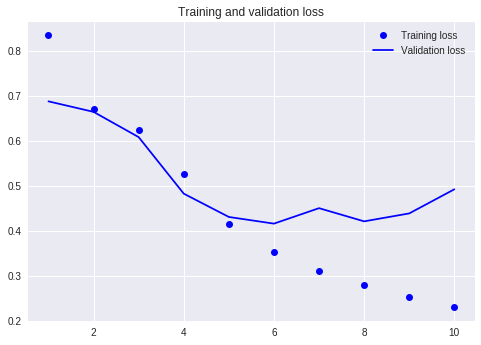

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()